In [105]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, shapiro, anderson
import scipy.stats as stats



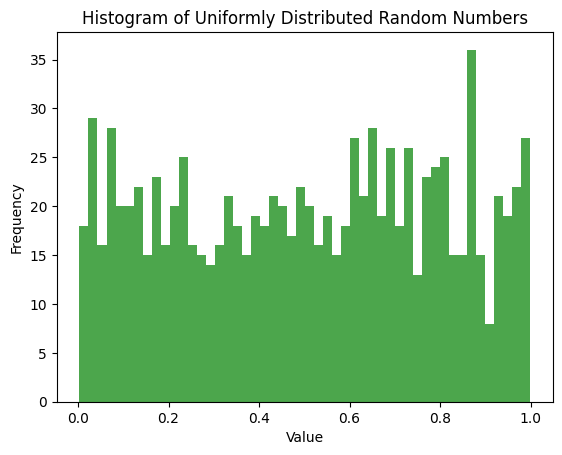

In [112]:
"""Generate random variables that are uniformly distributed."""

# generates 10 numbers between 0 and 1 using random lib
uni_nums1 = [random.random() for _ in range(100)] 

# generates 10 numbers b/n 0 and 1 using numpy lib
uni_nums2 = np.random.rand(1000) 

np.random.seed(42)
plt.hist(uni_nums2, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Uniformly Distributed Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [99]:
# Performing the Kolmogorov-Smirnov test (kstest)
# The kstest compares the empirical distribution of your data with a specified theoretical distribution
# 'uniform', args=(0, 1) specifies the theoretical uniform distribution from 0 to 1
ks_statistic, p_value = kstest(uni_nums2, 'uniform', args=(0, 1))

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")


KS Statistic: 0.029956251442476628
P-value: 0.3243752124357755


* KS Statistic: A lower value suggests that the distribution of your sample is closer to the theoretical distribution.
* P-value: A high p-value (typically > 0.05) suggests that we do not reject the hypothesis that the sample comes from a uniform distribution.
### Interpretation:
* If the histogram shows approximately equal frequencies across different intervals, it visually supports uniformity.
* In the statistical test, if the p-value is high, there is statistical support that your data is uniformly distributed.


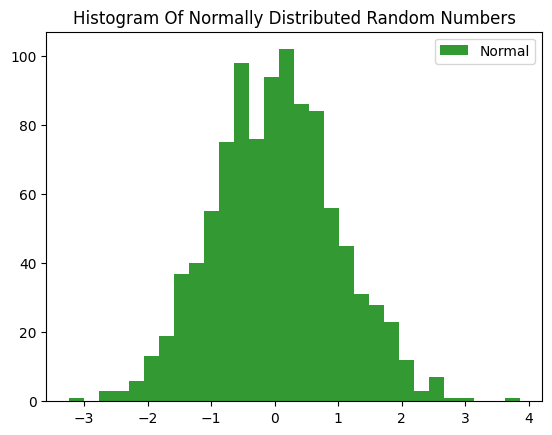

In [119]:
"""Generate random variables that are normally distributed (Gaussian distribution)."""
mu = 0 # mean
sigma = 1 # standard deviation
normal_nums = np.random.normal(mu, sigma, 1000)
np.random.seed(42)

# Histogram of normal distribution
plt.hist(normal_nums, bins=30, color='green', alpha=0.8, label='Normal')
plt.title('Histogram Of Normally Distributed Random Numbers')
plt.legend()
plt.show()

A Q-Q plot shows if the quantiles of your data match the quantiles of a normal distribution. Data that lie on or close to the line indicate that the dataset is normally distributed.

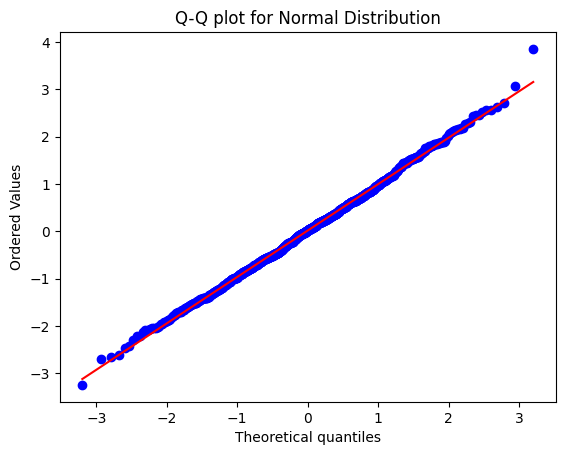

In [102]:

# Generating Q-Q plot
stats.probplot(normal_nums, dist="norm", plot=plt)
plt.title('Q-Q plot for Normal Distribution')
plt.show()


In [104]:
# Apply the Shapiro-Wilk test
# A high p-value (typically > 0.05) suggests that the data is normally distributed.
stat, p_value = shapiro(normal_nums)
print(f"Shapiro-Wilk Statistic: {stat}, P-value: {p_value}")


Shapiro-Wilk Statistic: 0.9986092190571166, P-value: 0.6272578290249117


In [107]:
# Apply the Anderson-Darling test
# Here you compare the statistic against critical values; 
# a statistic lower than the critical value at a certain significance level suggests normality.

result = anderson(normal_nums)
print('Anderson-Darling Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At significance level {sl}%: {result.statistic} < {cv} (data looks normal)")
    else:
        print(f"At significance level {sl}%: {result.statistic} > {cv} (data does not look normal)")

Anderson-Darling Statistic: 0.347
At significance level 15.0%: 0.3474697767348971 < 0.574 (data looks normal)
At significance level 10.0%: 0.3474697767348971 < 0.653 (data looks normal)
At significance level 5.0%: 0.3474697767348971 < 0.784 (data looks normal)
At significance level 2.5%: 0.3474697767348971 < 0.914 (data looks normal)
At significance level 1.0%: 0.3474697767348971 < 1.088 (data looks normal)


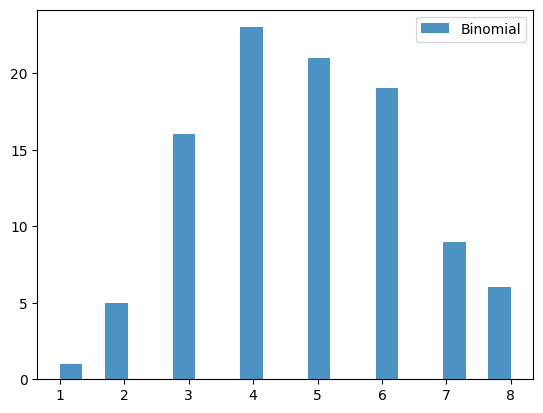

In [120]:
"""Generate random variables that are binomially distributed."""
n = 10 # number of trials
p = 0.5 # probability of success in a trial
binomial_nums = np.random.binomial(n, p, 100)
np.random.seed(42)
plt.hist(binomial_nums, bins=20, alpha=0.8, label='Binomial')
plt.legend()
plt.show()